In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
df=pd.read_csv('netflix_titles.csv')

In [10]:
pd.set_option('display.max_columns',20)

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.columns=df.columns.str.title()  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       8807 non-null   object
 1   Type          8807 non-null   object
 2   Title         8807 non-null   object
 3   Director      6173 non-null   object
 4   Cast          7982 non-null   object
 5   Country       7976 non-null   object
 6   Date_Added    8797 non-null   object
 7   Release_Year  8807 non-null   int64 
 8   Rating        8803 non-null   object
 9   Duration      8804 non-null   object
 10  Listed_In     8807 non-null   object
 11  Description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [14]:
df.isnull().sum()

Show_Id            0
Type               0
Title              0
Director        2634
Cast             825
Country          831
Date_Added        10
Release_Year       0
Rating             4
Duration           3
Listed_In          0
Description        0
dtype: int64

In [15]:
df.dropna(axis='index',how='any',subset=['Date_Added','Rating','Duration'],inplace=True)

In [16]:
df.isnull().sum()

Show_Id            0
Type               0
Title              0
Director        2621
Cast             825
Country          829
Date_Added         0
Release_Year       0
Rating             0
Duration           0
Listed_In          0
Description        0
dtype: int64

In [17]:
df.fillna('Unknown',inplace=True)
df

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# DATE

In [18]:
df['Date_Added']=pd.to_datetime(df['Date_Added'])

In [19]:
df.head()

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
df['Day']=df['Date_Added'].dt.day_name()

In [21]:
df['Date_Added'].min() #2008
#Earliest Realease Date

Timestamp('2008-01-01 00:00:00')

In [22]:
df['Date_Added'].max() #2021
#Latest Realease Date

Timestamp('2021-09-25 00:00:00')

In [23]:
df['Year_Added']=df['Date_Added'].dt.strftime('%Y') # Splitting Year from Date Added

In [24]:
Type_grp= df.groupby(['Type'])

In [25]:
Type_grp['Year_Added'].value_counts()

Type     Year_Added
Movie    2019          1424
         2020          1284
         2018          1237
         2021           993
         2017           836
         2016           251
         2015            56
         2014            19
         2011            13
         2013             6
         2012             3
         2009             2
         2008             1
         2010             1
TV Show  2020           595
         2019           592
         2021           505
         2018           411
         2017           349
         2016           175
         2015            26
         2013             5
         2014             5
         2008             1
Name: Year_Added, dtype: int64

In [26]:
df_train=pd.DataFrame(Type_grp["Year_Added"].value_counts())

In [27]:
df_train.rename(columns={'Year_Added':'Values'},inplace=True)

In [28]:
df_train.reset_index(inplace=True)

In [29]:
df_train

,Type,Year_Added,Values
0,Movie,2019,1424
1,Movie,2020,1284
2,Movie,2018,1237
3,Movie,2021,993
4,Movie,2017,836
5,Movie,2016,251
6,Movie,2015,56
7,Movie,2014,19
8,Movie,2011,13
9,Movie,2013,6


In [30]:
df_train.sort_values(by='Year_Added',ascending=True, inplace=True)

NameError: name 'fil' is not defined

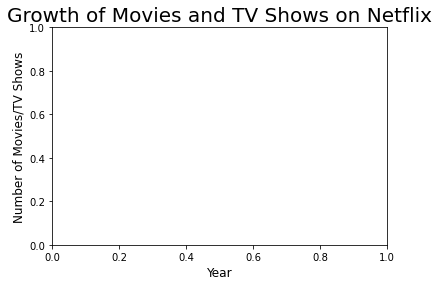

In [31]:
plt.title("Growth of Movies and TV Shows on Netflix", fontsize=20)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Movies/TV Shows',fontsize=12)


plt.plot(df_train.loc[fil,'Year_Added'],df_train.loc[fil,'Values'],label='Movies',color="#5f51fe",linewidth=3,marker='o')
plt.plot(df_train.loc[fil_2,'Year_Added'],df_train.loc[fil_2,'Values'],label='TV Shows',color='#d7fe02',linewidth=3,marker='o')
plt.legend()
plt.show

In [ ]:
fil=df_train['Type']=='Movie'
fil_2=df_train['Type']=='TV Show'

X_1=df_train.loc[fil,'Year_Added']
X_2=df_train.loc[fil_2,'Year_Added']

In [ ]:
x1_indice=np.arange(len(X_1))
x2_indice=np.arange(len(X_2))

In [ ]:
"""
plt.style.use('seaborn')
width=0.35
#plt.figure(figsize=(22,22))
plt.bar(x1_indice-width,df_train.loc[fil,'Values'],label='Movies',width=width,align='edge',edgecolor="white")
plt.bar(x2_indice,df_train.loc[fil_2,'Values'],label='TV Shows',width=width,align='edge',edgecolor="white")

plt.title('Movies vs TV Shows Released in Recent Years',fontsize=20)
plt.legend()
plt.xticks(ticks=x2_indice,labels=df_train.loc[fil_2,'Year_Added'])
plt.xlabel('Year',fontsize=13)
plt.ylabel('Number of Movies/TV Shows',fontsize=13)
#plt.tight_layout()
plt.show()

"""

In [ ]:
df['Difference_in_years']=df['Year_Added'].astype(float)-df['Release_Year']

In [ ]:
df['Difference_in_years'].mean()  # Mean time period between TvShow/Movie release and upload on netflix (years)

# DURATION ANALYSIS

In [ ]:
df['Duration'].unique()

In [ ]:
filtr=df['Duration'].str.contains('Seasons' and 'Season')
df['Seasons']=df.loc[filtr,'Duration']

In [ ]:
df['Seasons'].fillna('1 Season',inplace=True)  # Considering all Movies are Show with 1 Season

In [ ]:
df

In [ ]:
df[['Season','Trash']]=df['Seasons'].str.split(' ',expand=True)

In [ ]:
df.drop(columns=['Seasons','Trash'],inplace=True)

In [ ]:
df['Season']=df['Season'].astype(int)

In [ ]:
df['Season'].nlargest(10)

In [ ]:
filtr=df['Type']=='TV Show'
df.loc[filtr,'Season'].mean()  # Average Durartion of a TV show on Netflix

In [ ]:
filtr=df['Duration'].str.contains('min')
df['Dur']=df.loc[filtr,'Duration']

In [ ]:
df['Dur'].fillna(0,inplace=True)

In [ ]:
df[['Duration_in_minutes','Min']]=df['Dur'].str.split(' ',expand=True)

In [ ]:
df.drop(columns=['Min','Duration','Dur'],inplace=True)

In [ ]:
df['Duration_in_minutes'].fillna(0,inplace=True)

In [ ]:
df['Duration_in_minutes']=df['Duration_in_minutes'].astype(int)


In [ ]:
df.rename(columns={'Duration_in_minutes':'Duration_of_Movies'},inplace=True)

In [ ]:
df['Duration_of_Movies'].nlargest(10)

In [ ]:
filtr=df['Type']=='Movie'
df.loc[filtr,'Duration_of_Movies'].mean()  # Average Run Time of a Movie in minutes

# DAY ANALYSIS

In [ ]:
df['Day'].value_counts()

In [ ]:
filtr=df['Type']=='Movie'
df.loc[filtr,'Day'].value_counts()

In [ ]:
df_Day=pd.DataFrame(df.loc[filtr,'Day'].value_counts(normalize=True))
df_Day.reset_index(inplace=True)

In [ ]:
plt.style.available

In [ ]:
plt.style.use('seaborn')

In [ ]:
slices=df_Day['Day']
labels=df_Day['index']
plt.title("Release Day for Movies on Netflix",fontsize=25)
plt.rcParams["figure.figsize"] = (40,6)
plt.pie(slices,labels=labels,explode=[.07,0,0,0,0,0,0],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')

In [ ]:
filtr_2=df['Type']=='TV Show' 
df.loc[filtr_2,'Day'].value_counts()

In [ ]:
df_Day_2=pd.DataFrame(df.loc[filtr_2,'Day'].value_counts(normalize=True))
df_Day_2.reset_index(inplace=True)

In [ ]:
slices=df_Day_2['Day']
labels=df_Day_2['index']
plt.title("Release Day for TV Shows on Netflix",fontsize=25)
plt.rcParams["figure.figsize"] = (40,6)
plt.pie(slices,labels=labels,explode=[.07,0,0,0,0,0,0],wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')

# Directors and Actors

In [ ]:
df['Director'].value_counts().nlargest(10)

In [ ]:
filtr=df['Director']=='Rajiv Chilaka'
df.loc[filtr,'Description'].str.contains('Bheem')

# Rajiv Chilika is the Director of Several Movies of an Indian Cartoon 'Chota Bheem'

In [ ]:
df[filtr]

# Rajiv Chilika is the Director of 'Chhota Bheem movies', an Indian Cartoon.        Average Runtime of a movie is 67.8 Minutes

In [ ]:
df

In [ ]:
df['Listed_In'].value_counts().nlargest(10)

In [32]:
df['Rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: Rating, Length: 8790, dtype: object